In [4]:
import my_functions as ft
import torch
import torch.nn as nn

# Load the data
g_model_name = 'BTCUSD_bad_dataset_1H_100candles_balanced_0.pth'
g_dataset_name = 'BTCUSD_bad_dataset_1H_100candles'

class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        #self.dropout1 = nn.Dropout(p=0.7)
        self.fc2 = nn.Linear(64, 32)
        #self.dropout2 = nn.Dropout(p=0.7)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        #x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        #x = self.dropout2(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        return x
g_model = Model(500)
g_model.load_state_dict(torch.load(g_model_name))
g_device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
g_seed = 42

17 1599
Loss: 0.3080
metric_values: []


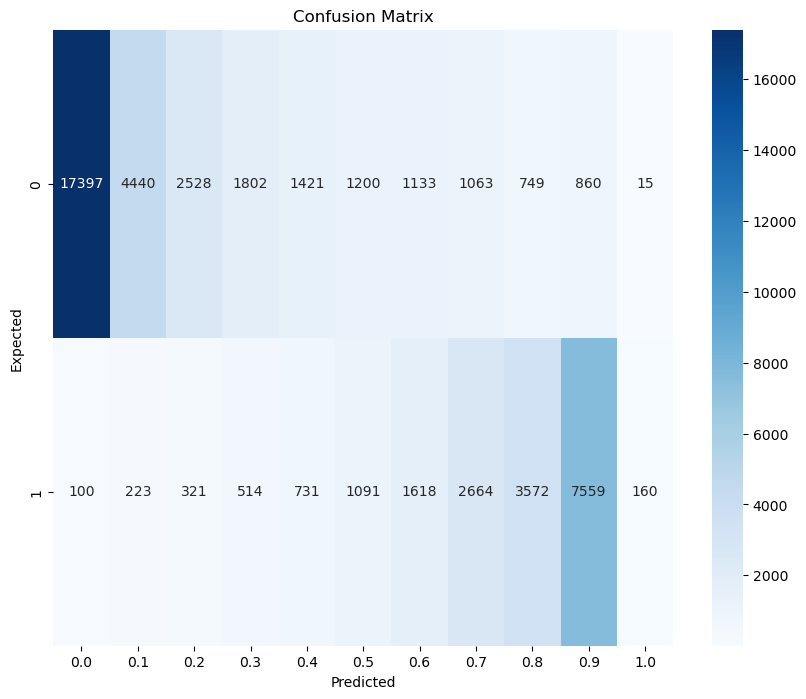

Variance of Predictions: 0.13026075065135956


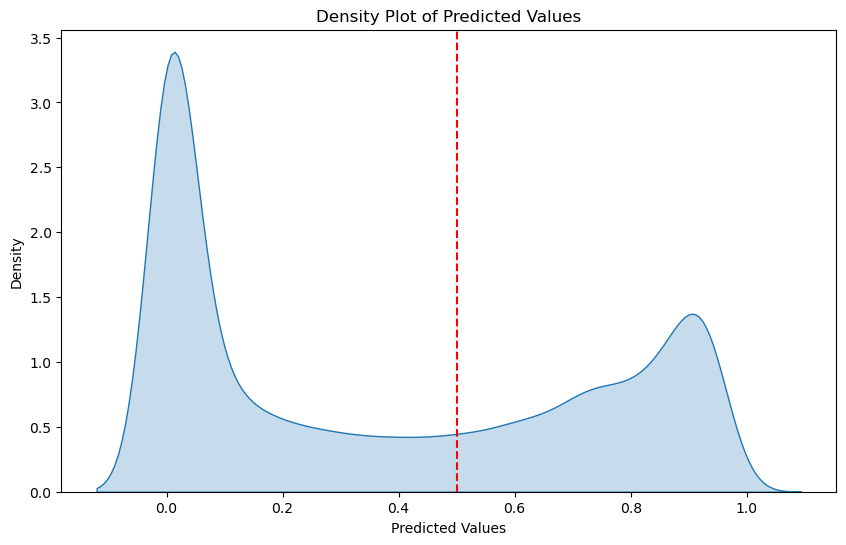

In [6]:
g_df = ft.load_dataset(g_dataset_name)

tmp_X = g_df.iloc[:, :-1].values
tmp_y = g_df.iloc[:, -1].values
_, tmp_loader = ft.create_data_loaders(
	X=tmp_X,
	y=tmp_y,
	batch_size=32,
	train_percentage=0.01,
	shuffle=False,
	device=g_device,
	random_state=g_seed)
print(len(_), len(tmp_loader))
tmp_loss, metric_values = ft.test_model(g_model, tmp_loader, nn.BCELoss(), None)
# Plot Loss
print(f'Loss: {tmp_loss:.4f}')
print(f'metric_values: {metric_values}')
ft.plot_confusion_matrix(g_model, tmp_loader, 11)
ft.plot_predictions_density(g_model, tmp_loader)

ft.del_tmp_vars()